In [3]:
import cbpro
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import pickle
import fetcher
plt.rcParams['figure.figsize'] = [35,12]
import importlib
importlib.reload(fetcher)



<module 'fetcher' from 'c:\\VSCode\\coin\\fetcher.py'>

In [4]:
GRANULARITY = 21600 #  6 hours
WINDOW = 84 # 3 weeks (used for mean and std)
#result = fetcher.merge_close_prices(GRANULARITY,fileName="all_products.txt")
#result.to_csv("allproducts_close.csv")
close = pd.read_csv("allproducts_close.csv", header=0, index_col='date', parse_dates=True)
#closeStdFromMean = fetcher.calculate_std_from_mean(close)

In [5]:
most_products = list(close[1770:-2].isnull().sum()[close[1770:-2].isnull().sum()==0].index)
with open("most_products.txt", 'w') as file:
    for product in most_products:
        file.write(product + '\n')
close_most_products = close[most_products].dropna()

In [6]:
close_most_products

,BTC-USD,ETH-USD,UNI-USD,LTC-USD,LINK-USD,BCH-USD,FIL-USD,WBTC-USD,ETC-USD,XLM-USD,...,AAVE-USD,GRT-USD,XTZ-USD,ALGO-USD,MKR-USD,COMP-USD,DASH-USD,ZEC-USD,YFI-USD,SNX-USD
date,,,,,,,,,,,,,,,,,,,,,
2020-12-17 12:00:00,23055.29,650.91,3.8231,101.38,13.80001,316.42,28.7643,23042.32,6.540,0.191052,...,84.840,0.1375,2.3682,0.3400,543.5142,155.00,109.042,75.64,26531.18,5.3213
2020-12-17 18:00:00,22826.48,643.37,3.6968,101.17,13.46155,310.81,28.4772,22706.31,6.491,0.186366,...,85.174,0.1227,2.2997,0.3322,539.0345,177.36,108.251,74.36,26632.98,5.3076
2020-12-18 00:00:00,22968.41,646.30,3.6987,108.61,13.62060,314.82,28.7275,22945.66,6.473,0.185721,...,83.865,0.1738,2.3265,0.3293,537.7782,157.09,110.348,75.56,26408.06,5.5299
2020-12-18 06:00:00,22873.94,650.32,3.7498,108.45,13.67000,315.85,28.6341,22864.87,6.444,0.184328,...,85.119,0.1917,2.3110,0.3289,559.2467,158.24,108.858,73.89,27653.75,5.9199
2020-12-18 12:00:00,22770.38,646.93,3.6974,108.00,13.48008,310.05,28.5323,22725.39,6.384,0.182442,...,86.646,0.2498,2.3101,0.3264,559.7032,157.32,106.946,73.46,27387.37,6.1712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-20 18:00:00,43012.97,2976.48,20.9039,157.23,23.56574,542.23,74.4014,43007.84,49.083,0.282229,...,291.832,0.6999,5.3074,1.6756,2437.6353,337.76,170.160,118.93,29553.61,10.6497
2021-09-21 00:00:00,42552.80,2994.25,20.8866,157.83,23.05636,533.46,73.6265,42618.22,48.780,0.279098,...,293.895,0.6919,5.0917,1.6606,2470.2080,334.31,171.555,117.20,29166.76,10.6739
2021-09-21 06:00:00,43287.80,3062.87,21.3276,160.00,24.08634,547.44,75.7560,43169.88,49.904,0.284380,...,302.549,0.7221,5.4754,1.8011,2511.4004,345.49,175.030,119.64,30133.23,10.8850


<ipython-input-14-0f463da3a6b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onlyBTC['20dAverage'] = close_most_products['BTC-USD'].rolling(window=20, min_periods=2).mean()


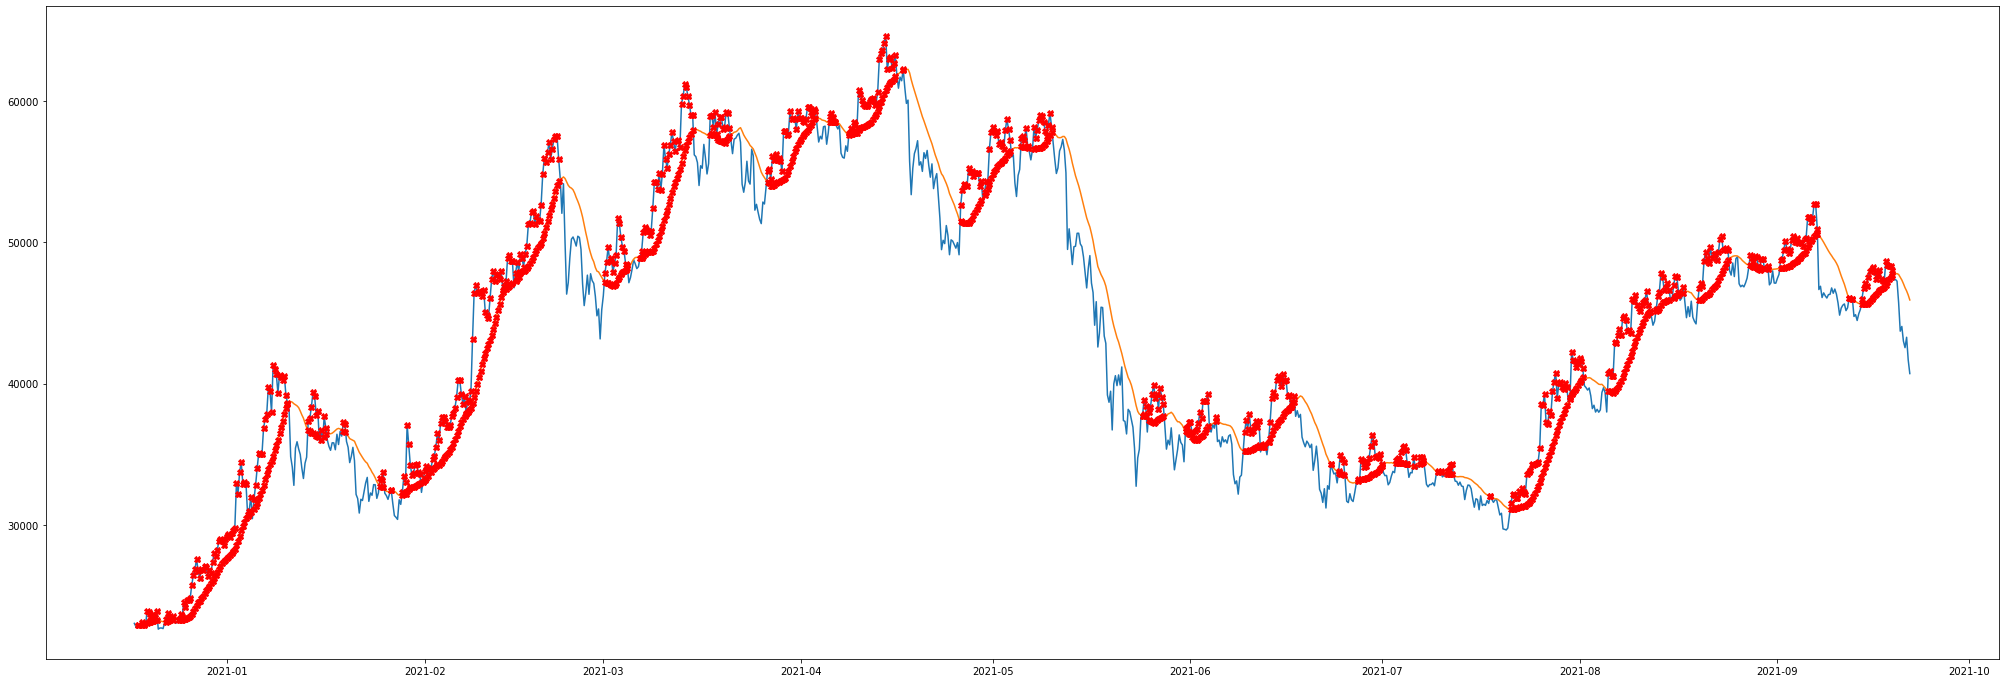

In [14]:
onlyBTC = close_most_products[['BTC-USD']]
onlyBTC['20dAverage'] = close_most_products['BTC-USD'].rolling(window=20, min_periods=2).mean()
historics = onlyBTC[onlyBTC['BTC-USD']>onlyBTC['20dAverage']]
plt.plot(onlyBTC)
plt.plot(historics, linestyle='None', marker='X', color='red')

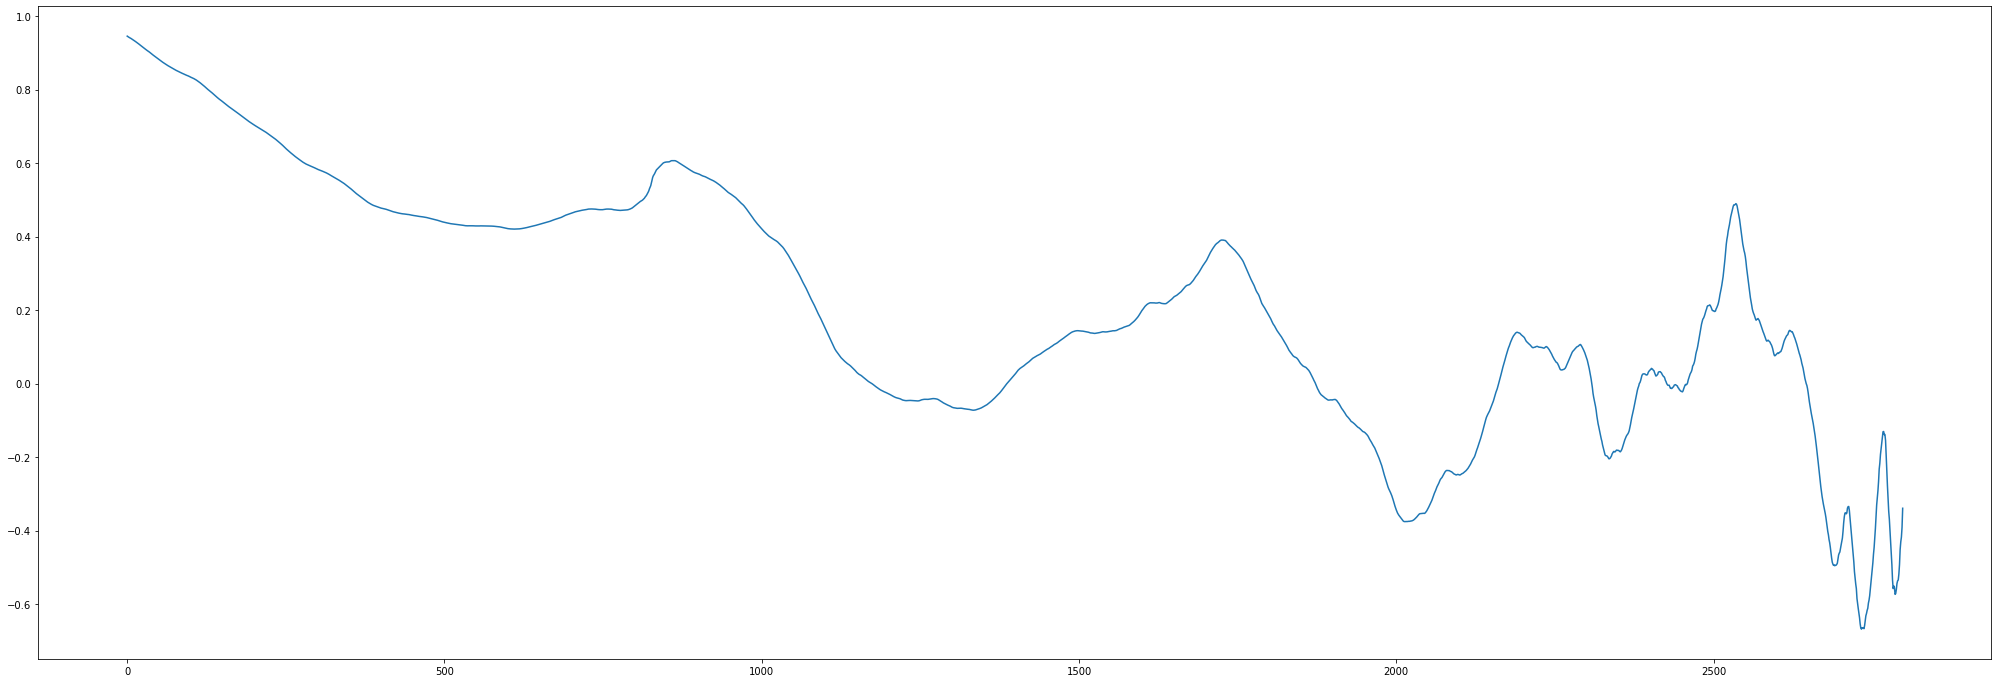

In [4]:
corr = []
for i in range(1,2800): #1 week max lag
    corr.append(close['BTC-USD'][i:].corr(close['ALGO-USD'].shift(i).dropna()))
plt.plot(corr)

No handles with labels found to put in legend.


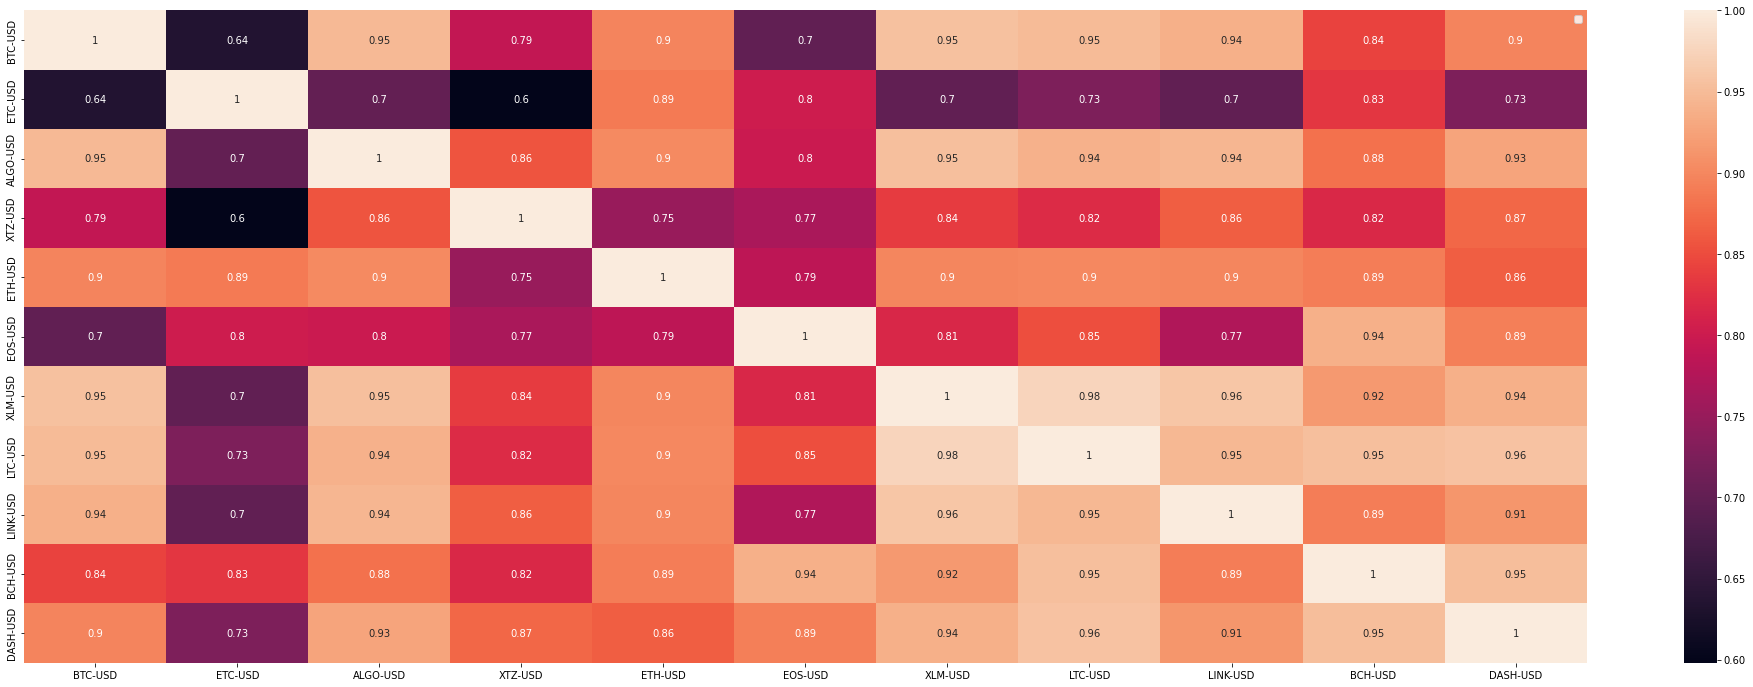

In [5]:
import seaborn as sns
sns.heatmap(close.corr(), annot=True)
plt.legend()
plt.show()

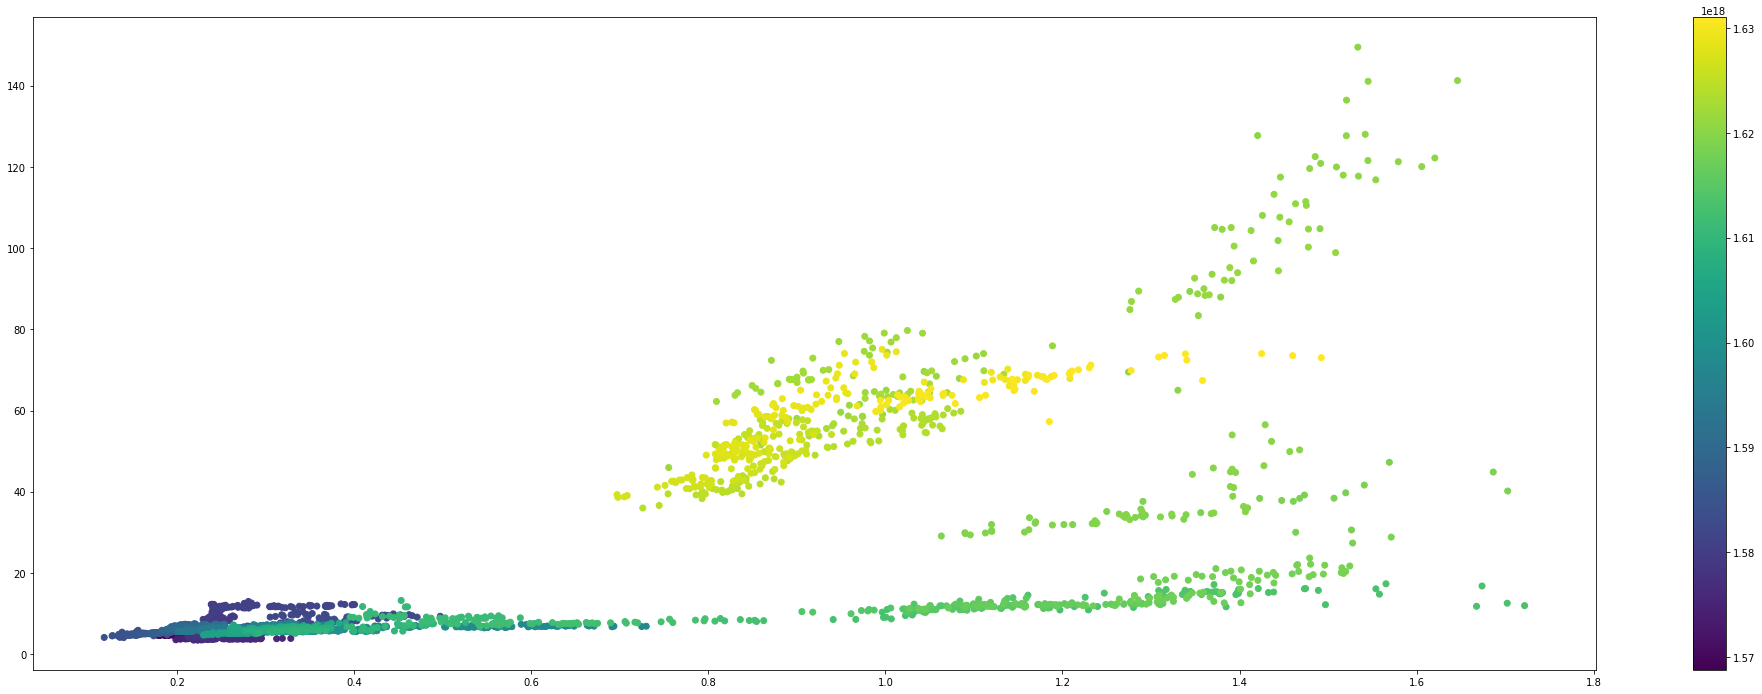

In [6]:
plt.scatter(close['ALGO-USD'], close['ETC-USD'], c=close.index)
plt.colorbar()

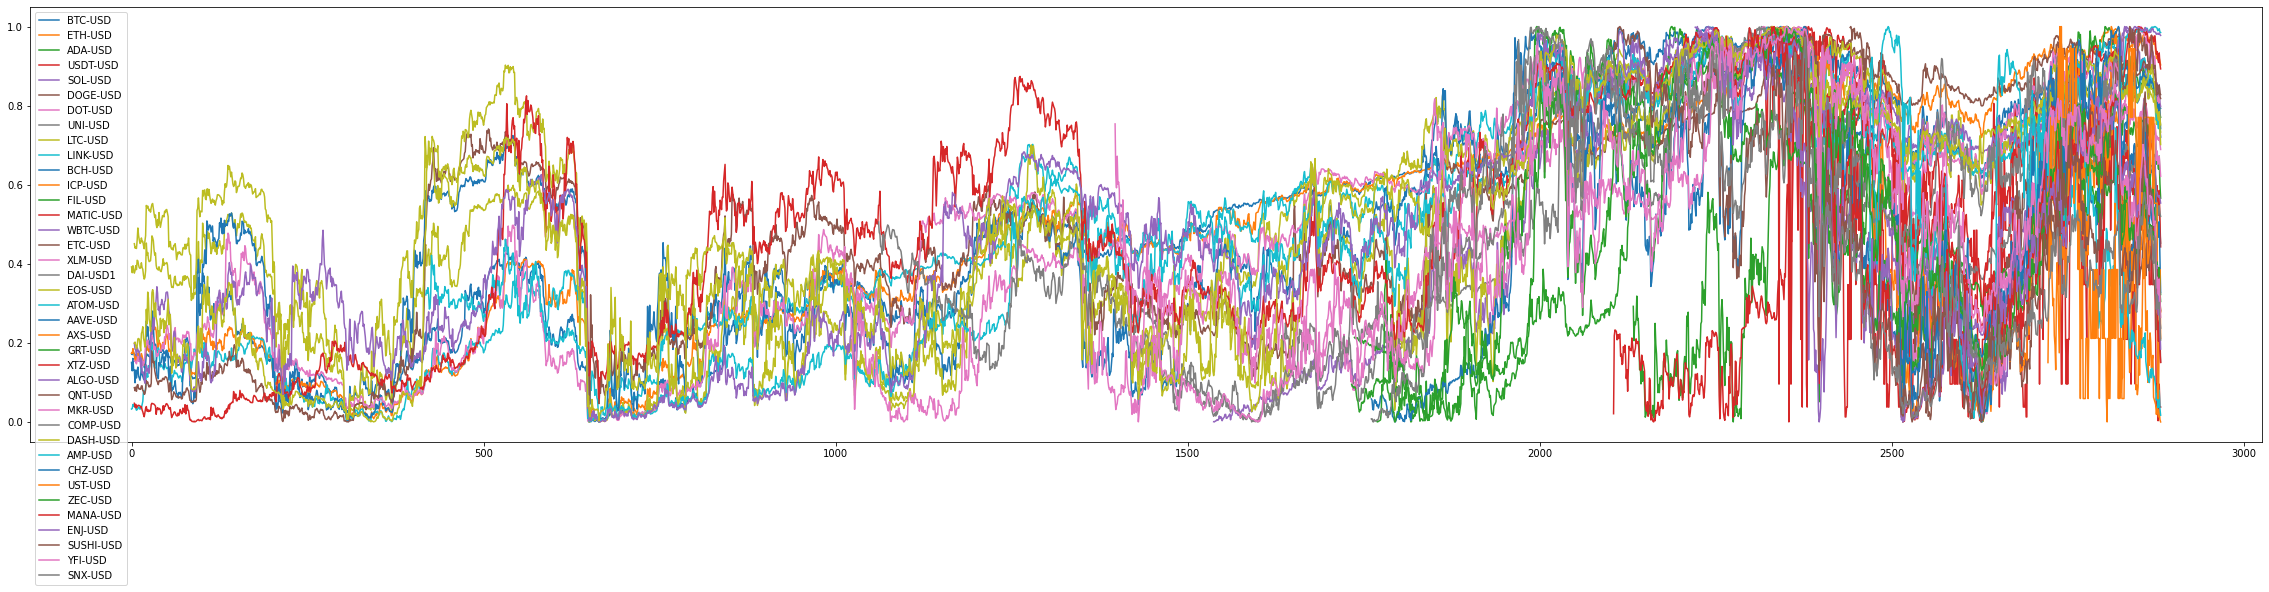

In [19]:
from  sklearn.preprocessing import RobustScaler, MinMaxScaler, QuantileTransformer
df = close[:]
scaler = QuantileTransformer()
scaler.fit(df)
plt.plot(scaler.transform(df))

plt.legend(df.columns, loc='upper left')


In [22]:
import matplotlib
%matplotlib inline
# widget
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = (40, 8)
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

In [23]:
import warnings
warnings.filterwarnings('ignore')

leg = []
def plotter(name, dates):
    df = close[dates[0]:dates[1]]
    if not name in leg:
        leg.append(name)
    else:
        pass
    a = QuantileTransformer().fit_transform(df[leg].values.reshape(-1,len(leg)))
    fig, ax = plt.subplots(ncols=2)
    sns.heatmap(df[leg].corr(), annot=True)
    
    ax[0].plot(df.index, a);
    ax[0].legend(leg, loc='upper left')
    plt.show()
    #plt.plot(close[name])
    #plt.legend(name, loc='upper left') 
options = list(close.index)
index = (0, len(options)-1)

selection_range_slider = widgets.SelectionRangeSlider(
    options=options,
    index=index,
    description='Dates',
    orientation='horizontal',
    layout={'width': '500px'}
)

widgets.interact(plotter, name=list(close.columns),  dates=selection_range_slider);

interactive(children=(Dropdown(description='name', options=('BTC-USD', 'ETH-USD', 'ADA-USD', 'USDT-USD', 'SOL-…

In [6]:
priors = pct_change['BTC-USD'].value_counts()/len(pct_change)

In [85]:
columns = ['likelihood-1', 'likelihood0', 'likelihood1']
etc['likelihood-1'] = etc[etc[TARGET]==-1]['counts'] / pct_change[pct_change[TARGET]==-1][TARGET].size
etc['likelihood0'] = etc[etc[TARGET]==0]['counts'] / pct_change[pct_change[TARGET]==0][TARGET].size
etc['likelihood1'] = etc[etc[TARGET]==1]['counts'] / pct_change[pct_change[TARGET]==1][TARGET].size
etc['likelihood'] = etc[columns].sum(1)
etc

,BTC-USD,ALGO-USD,counts,likelihood-1,likelihood0,likelihood1,likelihood
0,-1.0,-1.0,117,0.291045,NaN,NaN,0.291045
1,-1.0,0.0,23,NaN,0.011443,NaN,0.011443
2,-1.0,1.0,4,NaN,NaN,0.008529,0.008529
3,0.0,0.0,1928,NaN,0.959204,NaN,0.959204
4,0.0,1.0,379,NaN,NaN,0.808102,0.808102
5,0.0,-1.0,277,0.689055,NaN,NaN,0.689055
6,1.0,1.0,86,NaN,NaN,0.183369,0.183369
7,1.0,0.0,59,NaN,0.029353,NaN,0.029353
8,1.0,-1.0,8,0.019900,NaN,NaN,0.019900


In [8]:
target_counts = pct_change[TARGET].value_counts().to_frame()
target_counts['proportion'] = (target_counts[TARGET] / target_counts[TARGET].sum())
target_counts
#pd.merge(etc,target_counts,left_on='counts', right_on='ETC-USD')

etc['proportion'] = etc[TARGET].map(target_counts['proportion'].to_dict())
etc['count prop'] = etc['counts'] / etc.groupby(DRIVER)['counts'].transform('sum')
etc

,BTC-USD,ALGO-USD,counts,proportion,count prop
0,-1.0,0.0,82,0.697917,0.569444
1,-1.0,-1.0,36,0.139236,0.250000
2,-1.0,1.0,26,0.162847,0.180556
3,0.0,0.0,1840,0.697917,0.712350
4,0.0,1.0,414,0.162847,0.160279
5,0.0,-1.0,329,0.139236,0.127371
6,1.0,0.0,88,0.697917,0.575163
7,1.0,-1.0,36,0.139236,0.235294
8,1.0,1.0,29,0.162847,0.189542


In [260]:
pct_change[pct_change[TARGET]==1].mean() / pct_change.mean()

BTC-USD      2.046908
ETC-USD     -0.113717
ALGO-USD    42.352941
XTZ-USD     -1.334940
ETH-USD      0.751926
EOS-USD      6.140725
XLM-USD      1.228145
LTC-USD     -1.023454
LINK-USD     1.432836
BCH-USD      0.000000
DASH-USD     1.067952
dtype: float64

In [41]:
import importlib
importlib.reload(fetcher)
ternary = fetcher.convert_to_ternary_change(close_most_products, "ALGO-USD", 0.02, -1)
indexBeforeOne = ternary[ternary['ALGO-USD']==1.0].index



In [39]:
likelihood['ETC-USD']


NameError: name 'likelihood' is not defined

In [102]:
close_most_products

,BTC-USD,ETH-USD,UNI-USD,LTC-USD,LINK-USD,BCH-USD,FIL-USD,WBTC-USD,ETC-USD,XLM-USD,...,AAVE-USD,GRT-USD,XTZ-USD,ALGO-USD,MKR-USD,COMP-USD,DASH-USD,ZEC-USD,YFI-USD,SNX-USD
date,,,,,,,,,,,,,,,,,,,,,
2020-12-17 12:00:00,23055.29,650.91,3.8231,101.38,13.80001,316.42,28.7643,23042.32,6.540,0.191052,...,84.840,0.1375,2.3682,0.3400,543.5142,155.00,109.042,75.64,26531.18,5.3213
2020-12-17 18:00:00,22826.48,643.37,3.6968,101.17,13.46155,310.81,28.4772,22706.31,6.491,0.186366,...,85.174,0.1227,2.2997,0.3322,539.0345,177.36,108.251,74.36,26632.98,5.3076
2020-12-18 00:00:00,22968.41,646.30,3.6987,108.61,13.62060,314.82,28.7275,22945.66,6.473,0.185721,...,83.865,0.1738,2.3265,0.3293,537.7782,157.09,110.348,75.56,26408.06,5.5299
2020-12-18 06:00:00,22873.94,650.32,3.7498,108.45,13.67000,315.85,28.6341,22864.87,6.444,0.184328,...,85.119,0.1917,2.3110,0.3289,559.2467,158.24,108.858,73.89,27653.75,5.9199
2020-12-18 12:00:00,22770.38,646.93,3.6974,108.00,13.48008,310.05,28.5323,22725.39,6.384,0.182442,...,86.646,0.2498,2.3101,0.3264,559.7032,157.32,106.946,73.46,27387.37,6.1712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-20 18:00:00,43012.97,2976.48,20.9039,157.23,23.56574,542.23,74.4014,43007.84,49.083,0.282229,...,291.832,0.6999,5.3074,1.6756,2437.6353,337.76,170.160,118.93,29553.61,10.6497
2021-09-21 00:00:00,42552.80,2994.25,20.8866,157.83,23.05636,533.46,73.6265,42618.22,48.780,0.279098,...,293.895,0.6919,5.0917,1.6606,2470.2080,334.31,171.555,117.20,29166.76,10.6739
2021-09-21 06:00:00,43287.80,3062.87,21.3276,160.00,24.08634,547.44,75.7560,43169.88,49.904,0.284380,...,302.549,0.7221,5.4754,1.8011,2511.4004,345.49,175.030,119.64,30133.23,10.8850


In [109]:
import warnings
warnings.filterwarnings('ignore')

import importlib
importlib.reload(fetcher)
limit=0.02
products = fetcher.read_products_list()
inversions = {}
close = close_most_products.copy()

for product in most_products:
    close = close_most_products.copy()
    indexesBeforeOne = fetcher.get_indexes_before_one(close, product, limit)
    close[product+"-DRIVER"] = close[product]
    #df_results = close.loc[filteredIndex].pct_change().shift().dropna()[[product]][:100]
    
    prediction = fetcher.predictor(close, indexesBeforeOne, product, products+[product+"-DRIVER"],limit)
    
    #inversions[product] = (fetcher.count_inversions(df_results[product])) / (len(df_results)*len(df_results)/2)
    prior = fetcher.prior_proportions(close, product, limit)
    
    print(product, (prediction>prior[1.0]).mean(), prior[1.0])
    



BTC-USD 0.37777777777777777 0.16172506738544473
ETH-USD 0.4830188679245283 0.23809523809523808
UNI-USD 0.3485342019543974 0.27583108715184185
LTC-USD 0.46785714285714286 0.25157232704402516
LINK-USD 0.5083056478405316 0.27044025157232704
BCH-USD 0.49812734082397003 0.2398921832884097
FIL-USD 0.49333333333333335 0.20215633423180593
WBTC-USD 0.375 0.1725067385444744
ETC-USD 0.33948339483394835 0.24348607367475292
XLM-USD 0.4522058823529412 0.24438454627133874
EOS-USD 0.44525547445255476 0.24618149146451032
ATOM-USD 0.32840236686390534 0.3036837376460018
AAVE-USD 0.3333333333333333 0.2803234501347709
GRT-USD 0.34615384615384615 0.3036837376460018
XTZ-USD 0.34810126582278483 0.2839173405211141
ALGO-USD 0.3746031746031746 0.2830188679245283
MKR-USD 0.488135593220339 0.26504941599281223
COMP-USD 0.4890282131661442 0.28751123090745734
DASH-USD 0.33112582781456956 0.27133872416891286
ZEC-USD 0.3867595818815331 0.2578616352201258
YFI-USD 0.4645390070921986 0.25336927223719674
SNX-USD 0.32058823

In [137]:
importlib.reload(fetcher)
a = fetcher.counter_proportions_dictionary(close, 'SNX-USD', products+['SNX-USD-DRIVER'])
#fetcher.counted_proportions(close, 'SNX-USD-DRIVER', 'SNX-USD')
a

{'BTC-USD':    BTC-USD  SNX-USD  counts  count prop  likelihood
 0     -1.0      1.0      56    0.361290    0.164706
 1     -1.0      0.0      54    0.348387    0.116379
 2     -1.0     -1.0      45    0.290323    0.146104
 3      0.0      0.0     330    0.424710    0.711207
 4      0.0      1.0     233    0.299871    0.685294
 5      0.0     -1.0     214    0.275418    0.694805
 6      1.0      0.0      80    0.444444    0.172414
 7      1.0      1.0      51    0.283333    0.150000
 8      1.0     -1.0      49    0.272222    0.159091,
 'ETC-USD':    ETC-USD  SNX-USD  counts  count prop  likelihood
 0     -1.0      0.0      80    0.352423    0.172414
 1     -1.0      1.0      78    0.343612    0.229412
 2     -1.0     -1.0      69    0.303965    0.224026
 3      0.0      0.0     274    0.446254    0.590517
 4      0.0      1.0     179    0.291531    0.526471
 5      0.0     -1.0     161    0.262215    0.522727
 6      1.0      0.0     110    0.405904    0.237069
 7      1.0      1.0   

In [98]:
tern = fetcher.convert_to_ternary_change(close, target, 0.02, 0)
shifted = tern[target].shift(-1)
shifted[shifted==0]

date
2020-12-17 18:00:00    0.0
2020-12-18 00:00:00    0.0
2020-12-18 06:00:00    0.0
2020-12-19 00:00:00    0.0
2020-12-19 18:00:00    0.0
                      ... 
2021-09-18 12:00:00    0.0
2021-09-18 18:00:00    0.0
2021-09-19 06:00:00    0.0
2021-09-19 12:00:00    0.0
2021-09-20 18:00:00    0.0
Name: ALGO-USD, Length: 529, dtype: float64

In [43]:
prior = fetcher.prior_proportions(close, 'ETC-USD', 0.02)

plt.plot(df_results['prediction'].values)
(df_results['prediction']>prior[1.0]).mean()




NameError: name 'df_results' is not defined

In [1]:
most_likely = []
for result in results:
    most_likely.append(result[1.0])
plt.hist(most_likely)


NameError: name 'results' is not defined

In [401]:
aframe=close.pct_change().shift().dropna()[['ALGO-USD']]
#aframe = fetcher.convert_to_ternary_change(close, 'ALGO-USD', 0.02, 1)[['ALGO-USD']]

aframe['predict'] = np.array(most_likely)
aframe = aframe.sort_values('predict',ascending=False)
fetcher.count_inversions(aframe['predict'])

KeyboardInterrupt: 

In [242]:
like = fetcher.counted_proportions(close, 'BTC-USD', 'ALGO-USD', 1, 0.02)
like['likelihood norm'] = like['likelihood']/like.groupby('BTC-USD')['likelihood'].transform('sum')
like

,BTC-USD,ALGO-USD,counts,count prop,likelihood,likelihood norm
0,-1.0,0.0,118,0.440299,0.075593,0.247797
1,-1.0,-1.0,82,0.305970,0.132045,0.432851
2,-1.0,1.0,68,0.253731,0.097421,0.319352
3,0.0,0.0,1311,0.568764,0.839846,0.358264
4,0.0,1.0,542,0.235141,0.776504,0.331244
5,0.0,-1.0,452,0.196095,0.727858,0.310492
6,1.0,0.0,132,0.429967,0.084561,0.241099
7,1.0,1.0,88,0.286645,0.126074,0.359461
8,1.0,-1.0,87,0.283388,0.140097,0.399440


In [230]:
sum = (0.126+0.14+0.085)
print(0.085/sum)
print(0.126/sum)
print(0.14/sum)

0.24216524216524216
0.3589743589743589
0.39886039886039887


<AxesSubplot:xlabel='date'>

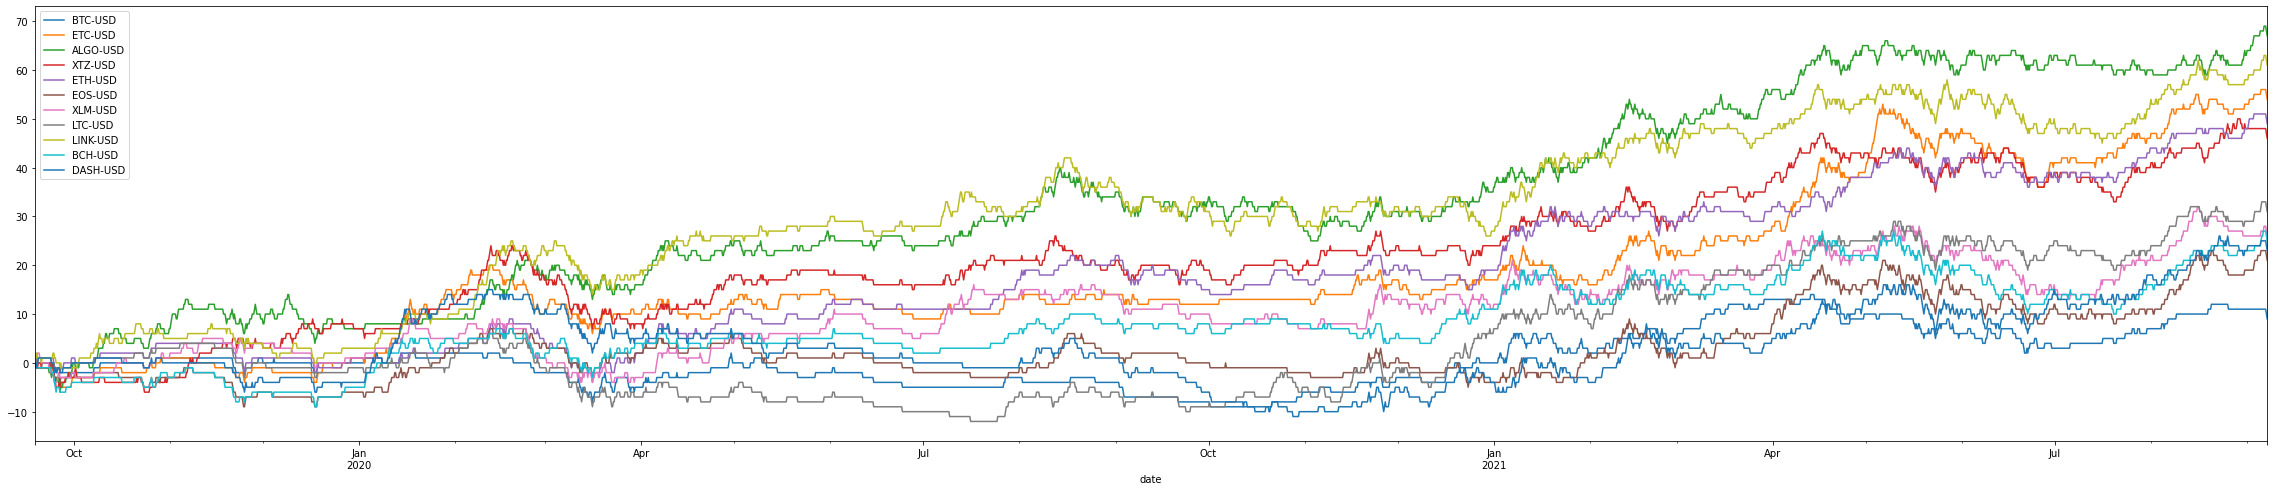

In [108]:
pct_change.cumsum().plot();


In [ ]:
pct = close.pct_change()
pctStdFromMean = fetcher.calculate_std_from_mean(pct)
oneDayAheadpct = pctStdFromMean[::-1].rolling(window=4, min_periods=0).mean()[::-1].shift(-1)

In [ ]:
merged = closeStdFromMean.merge(pctStdFromMean, how='inner', left_index=True, right_index=True, suffixes=('_CLOSE', '_PCT')).dropna()


In [ ]:
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
scaler = StandardScaler()
target = oneDayAheadpct['ETH-USD'][2:-2].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(merged[:-2], target) 
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)







In [ ]:
neigh = KNeighborsRegressor(30)
neigh.fit(X_train, y_train)

#plt.scatter(predict, y_test);
print(neigh.score(X_test,y_test))

In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=(60, 60), max_iter=300000)
mlp = mlp.fit(X_train_scaled, y_train)



In [ ]:
print(mlp.score(X_train_scaled, y_train))
print(mlp.score(X_test_scaled, y_test))

In [ ]:
test = pd.DataFrame({'a': [1,2,3,4,5], 'b': [100,200,300,400,500]})
test

In [ ]:
from  sklearn.preprocessing import RobustScaler

In [ ]:
scaler = RobustScaler()
test = scaler.fit_transform(test)
test

In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(close['BTC-USD'].dropna().values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

In [ ]:
plt.plot(close['BTC-USD'].dropna().values)